In [27]:
import pandas as pd # Data manipulation
import numpy as np # Matrix calculation
import geopandas as gpd # GIS of Pandas
import seaborn as sb # Parof of matplotlib for Data Viz
import matplotlib.pyplot as plt # data viz

In [28]:
df_rm_yields=pd.read_csv(r'C:\Users\Administrator\Desktop\jupytar\rm yeild\rm-yields-data (1).csv')
df_rm_yields.isna().sum()



Year                0
RM                  0
Winter Wheat    22503
Canola          11019
Spring Wheat      109
Mustard         20927
Durum           13681
Sunflowers      24661
Oats             1259
Lentils         19700
Peas            16904
Barley            335
Fall Rye         9693
Canary Seed     21666
Spring Rye      24802
Tame Hay        21402
Flax             4297
Chickpeas       24311
dtype: int64

In [29]:
# Reading 2000-2023 Aggregated Yield Data
df_agg_00_23=pd.read_csv(r'C:\Users\Administrator\Desktop\jupytar\final project\rm_yield_00_23_major_crops.csv')

# Reading GIS
gdf_rm=gpd.read_file(r'C:\Users\Administrator\Desktop\jupytar\final project\RM_shapefile\RuralMunicipality.shp')

# Changing data type 
gdf_rm['RMNO']=gdf_rm['RMNO'].astype(int)
gdf_rm_clean=gdf_rm[['RMNO', 'geometry']].rename(columns={'RMNO': 'RM'})

In [32]:
df_major_crops=df_rm_yields[['Year', 'RM', 'Canola', 'Spring Wheat',
       'Durum','Oats', 'Lentils', 'Peas', 'Barley']]
       #df_00_23=df_major_crops[df_major_crops['Year']>=2000].drop(columns='decade')
df_00_23=df_major_crops[df_major_crops['Year']>=2000]

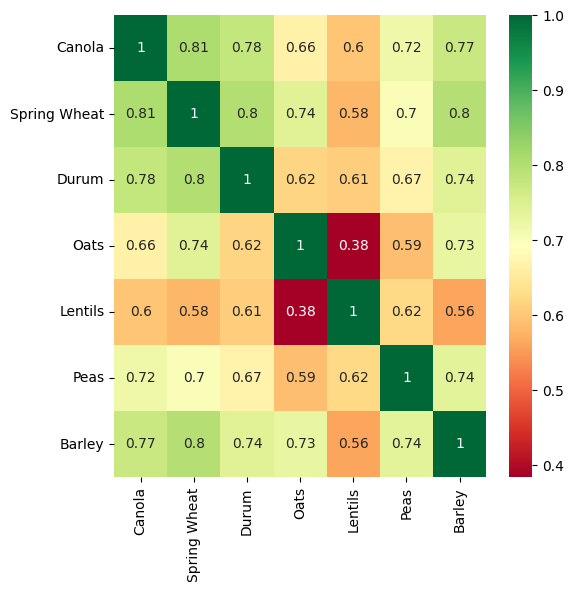

In [40]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(6, 6))
sb.heatmap(corr_matrix, annot=True, cmap='RdYlGn')

# Show the plot
plt.show()


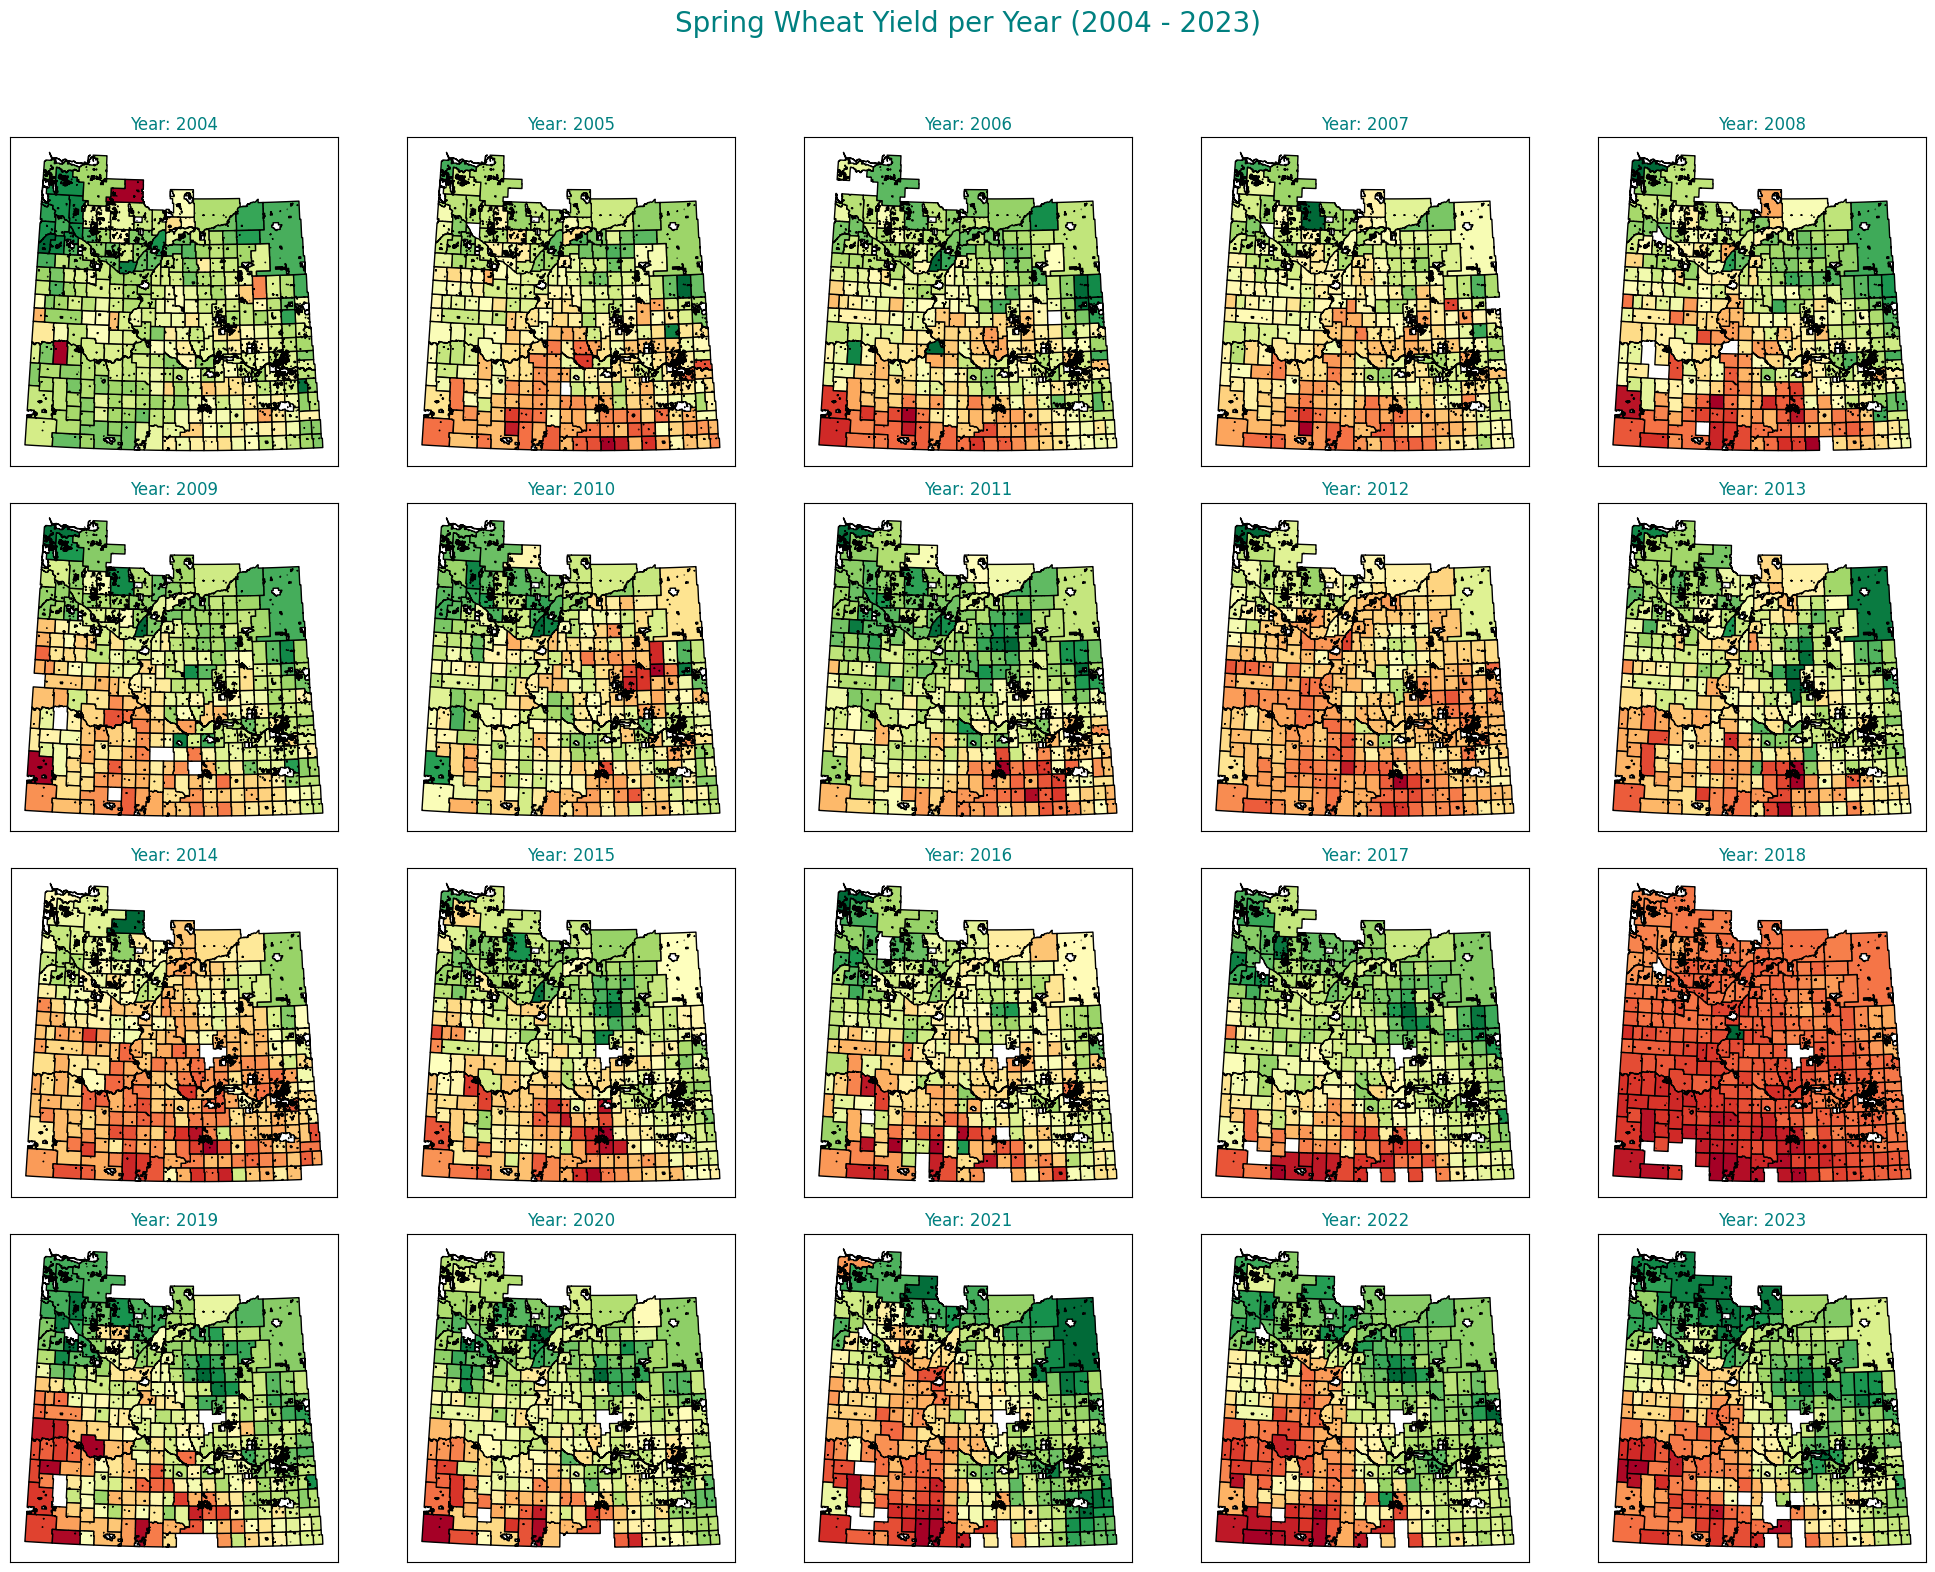

In [97]:
# List of crops to include in plots
crops = ['Spring Wheat']

# List of years to include in subplots
years = list(range(2004, 2023 + 1))

# Function to plot yield data for a specific crop
def plot_yield_by_year(crop):
    # Set up the figure with 4 rows and 5 columns for the 20 subplots
    fig, axs = plt.subplots(4, 5, figsize=(20, 16))
    fig.suptitle(f'{crop} Yield per Year (2004 - 2023)', color='teal', size=20)

    # Flatten the axs array for easy indexing
    axs = axs.flatten()

    # Loop through each year and plot it on its respective subplot
    for i, year in enumerate(years):
        ax = axs[i]
        gdf_rm_yield[gdf_rm_yield['Year'] == year].plot(
            column=crop,
            cmap='RdYlGn',
            legend=False,
            ax=ax,
            edgecolor='black'
        )
        ax.set_title(f'Year: {year}', color='teal', size=12)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel('')
        ax.set_ylabel('')

    # Adjust the spacing between subplots for readability
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Generate plots for each crop
for crop in crops:
    plot_yield_by_year(crop)

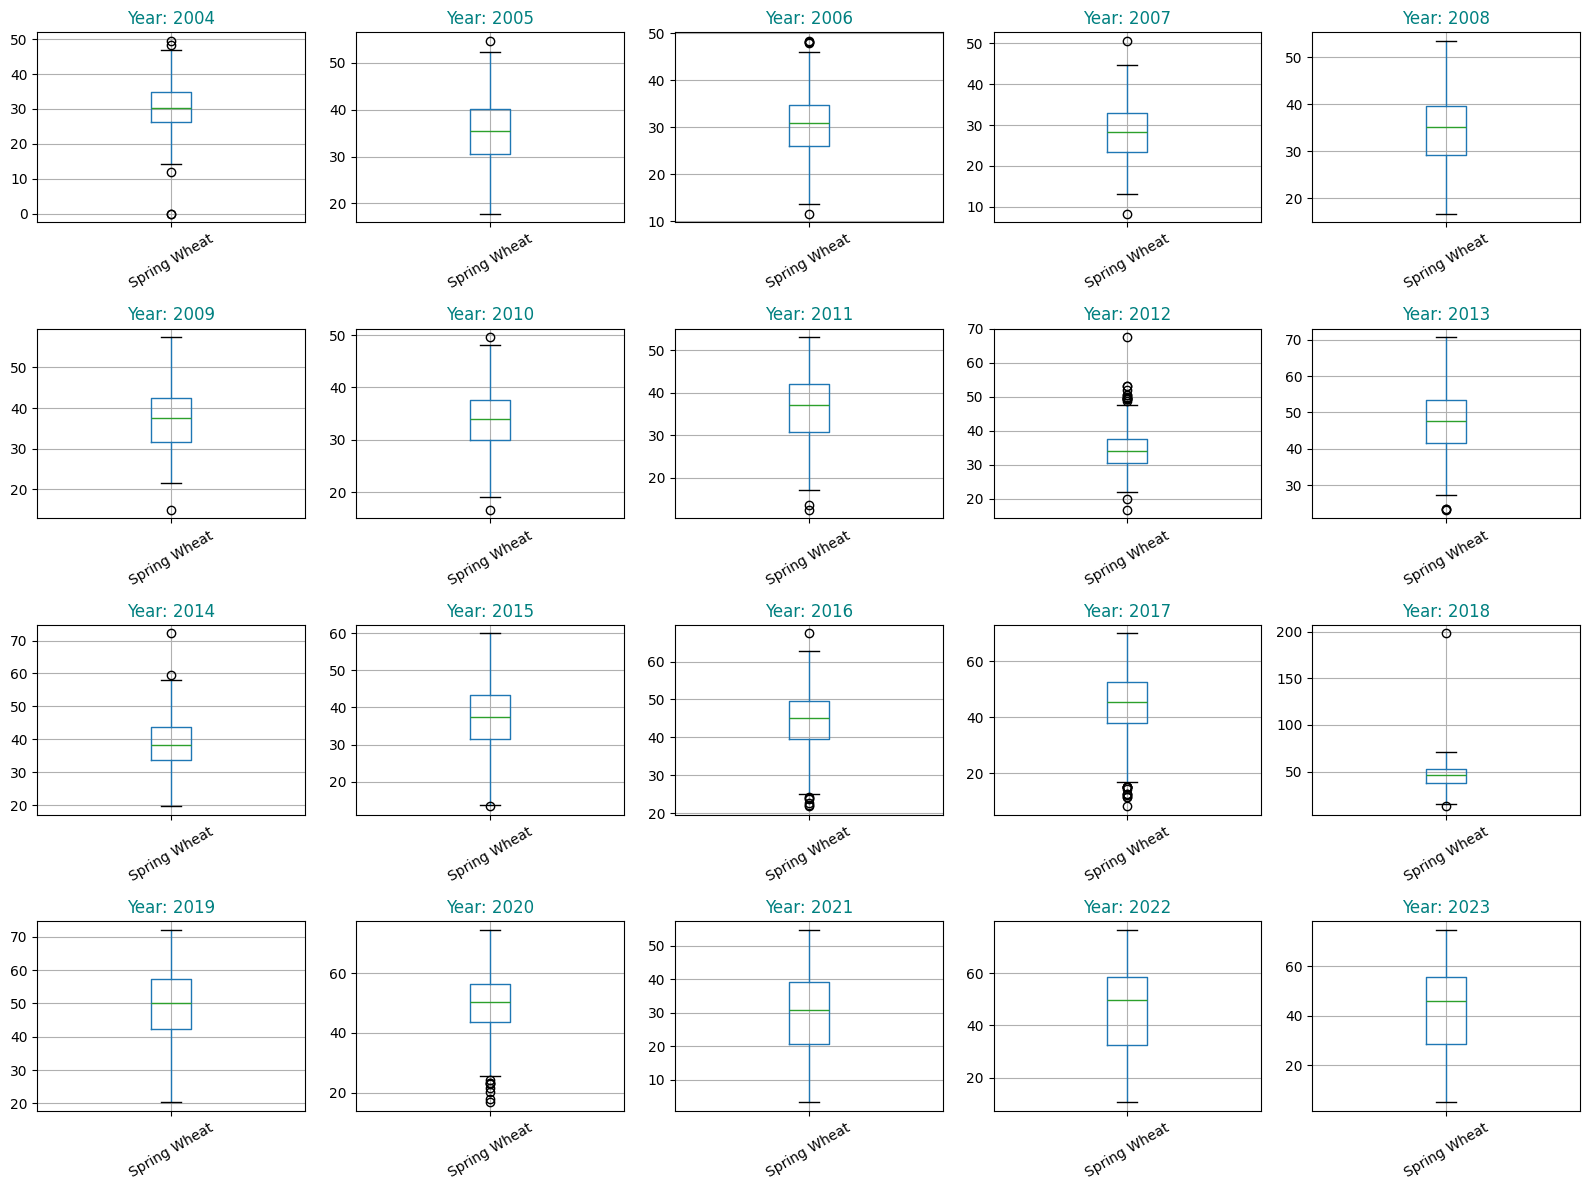

In [85]:
# Filter the DataFrame for the years 2004-2023
filtered_df = df_major_crops[(df_major_crops['Year'] >= 2004) & (df_major_crops['Year'] <= 2023)]

# Define the list of crops
crops = [ 'Spring Wheat']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(16, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the years and create a boxplot for each crop
for i, year in enumerate(range(2004, 2023 + 1)):
    if i < len(axes):
        ax = axes[i]
        year_data = filtered_df[filtered_df['Year'] == year]
        year_data.boxplot(column=crops, ax=ax)
        ax.set_title(f'Year: {year}', size=12, color='teal')
        ax.tick_params(axis='x', rotation=30)  # Rotate x-tick labels

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

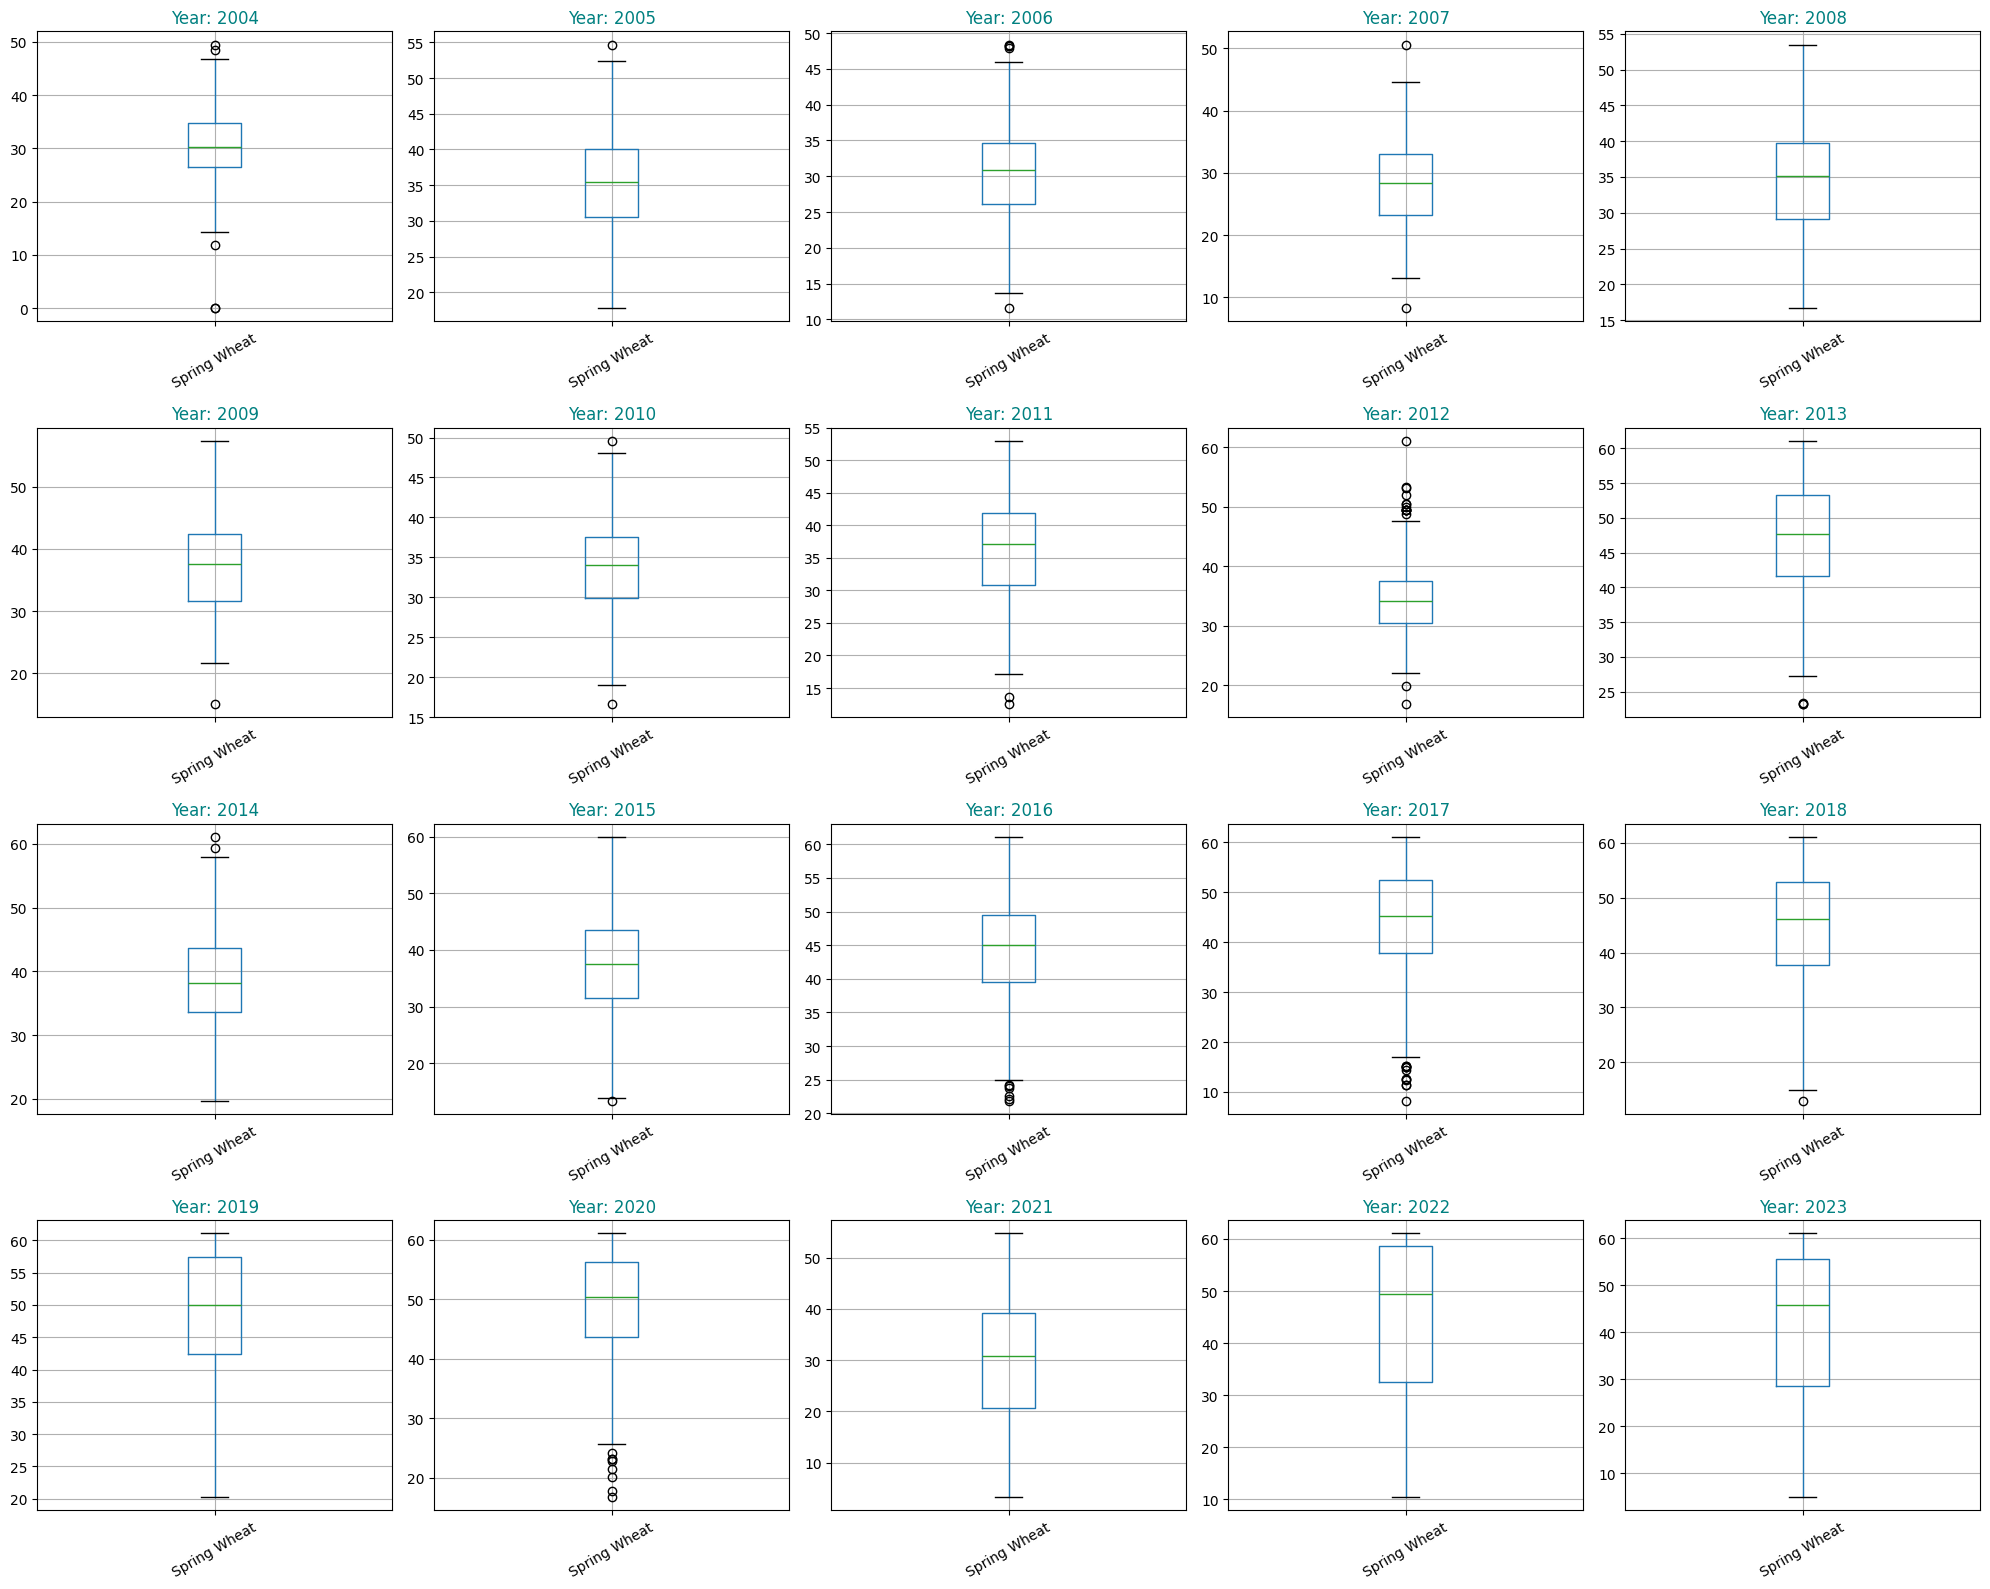

In [84]:
# Define the list of crops
crops = [ 'Spring Wheat']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the years and create a boxplot for each crop
for i, year in enumerate(range(2004, 2023 + 1)):
    if i < len(axes):
        ax = axes[i]
        year_data = df_clipped[df_clipped['Year'] == year]
        year_data.boxplot(column=crops, ax=ax)
        ax.set_title(f'Year: {year}', size=12, color='teal')
        ax.tick_params(axis='x', rotation=30)  # Rotate x-tick labels

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

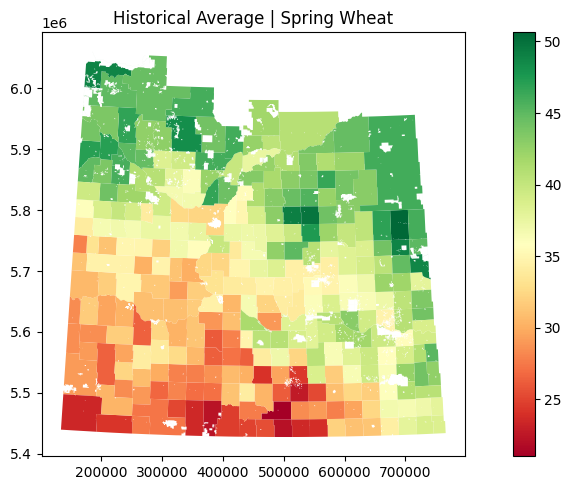

In [108]:
merged_df = pd.merge(
    gdf_rm_clean.rename(columns={'RMNO': 'RM'}),
    df_00_23.groupby('RM').mean(),
    on='RM'
)

# List of crops
crops = ['Spring Wheat']

# Create a subplot for each crop
if len(crops) == 1:
    fig, ax = plt.subplots(figsize=(10, 5))
    merged_df.plot(column=crops[0], cmap='RdYlGn', legend=True, ax=ax)
    ax.set_title(f'Historical Average | {crops[0]}')
else:
    fig, axes = plt.subplots(nrows=len(crops), figsize=(10, 5 * len(crops)))
    for i, crop in enumerate(crops):
        merged_df.plot(column=crop, cmap='RdYlGn', legend=True, ax=axes[i])
        axes[i].set_title(f'Historical Average | {crop}')

plt.tight_layout()
plt.show()

Optimal number of clusters for Canola: 3
Silhouette scores for Canola: [0.3814564205490793, 0.3885877047664673, 0.34565486635512543, 0.34463118890434563, 0.33653937502511105, 0.33803056457241737, 0.3429252134086175, 0.32087673456199095, 0.2979354631712626]


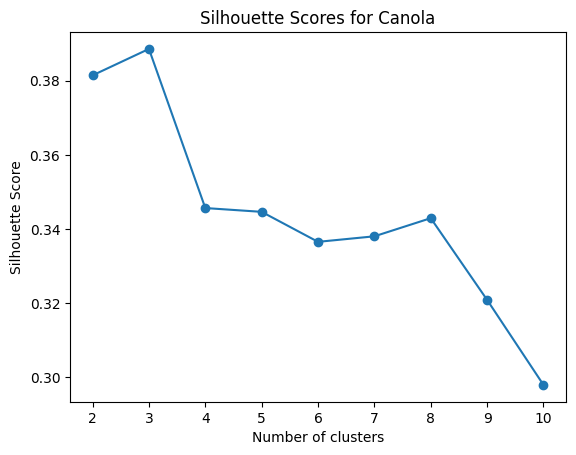

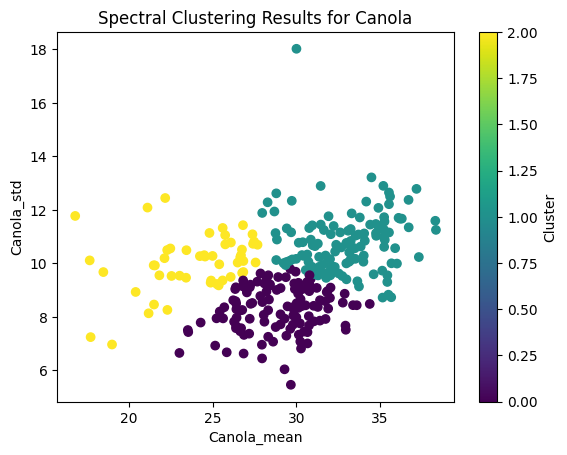

Optimal number of clusters for Spring Wheat: 2
Silhouette scores for Spring Wheat: [0.4526454016915555, 0.40982051487776133, 0.38881110650149964, 0.3903372028919639, 0.3099674793795712, 0.30642903599774574, 0.3168972679440432, 0.2904913458220534, 0.30504601005681137]


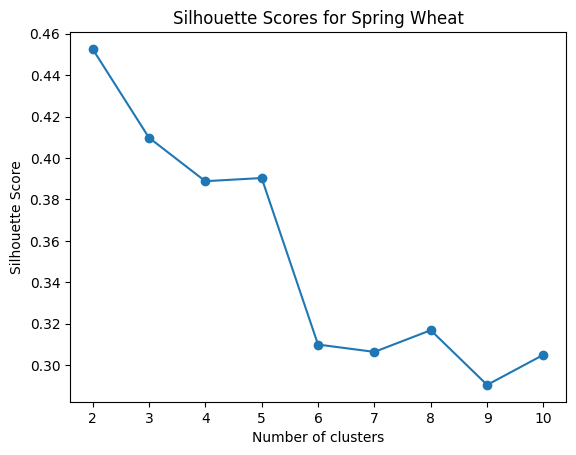

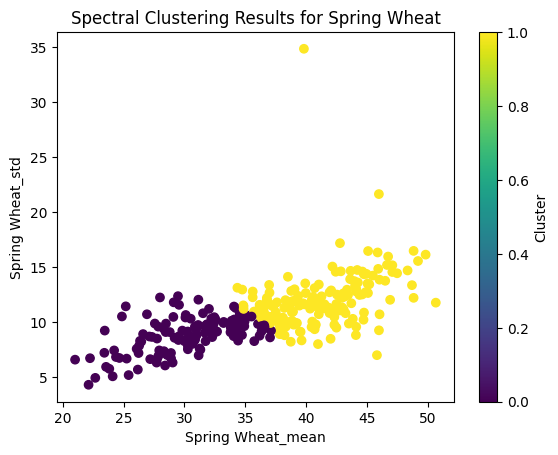

Optimal number of clusters for Durum: 2
Silhouette scores for Durum: [0.6284451116000132, 0.6091423890912017, 0.5093762865298491, 0.5153683489872898, 0.40338893868238734, 0.3509118088721234, 0.3608837374922696, 0.31170820336514277, 0.3095636159099605]


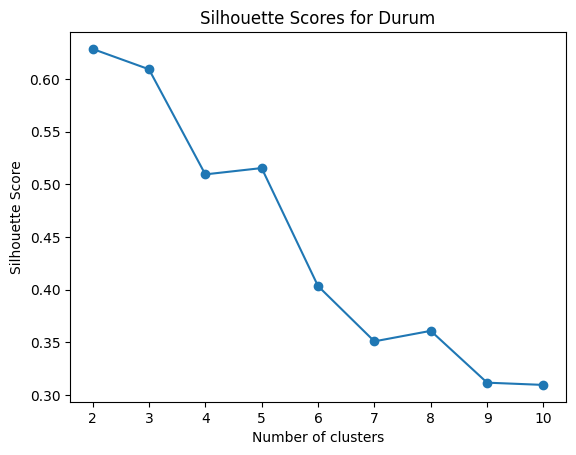

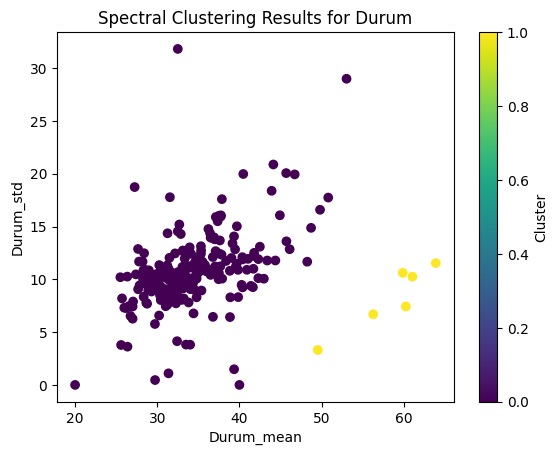

Optimal number of clusters for Oats: 2
Silhouette scores for Oats: [0.4861185821587076, 0.3596263835337619, 0.3952967598647857, 0.3601939538593756, 0.3809608620731302, 0.385973195832522, 0.36843567332397814, 0.37262712455779173, 0.36971141264202095]


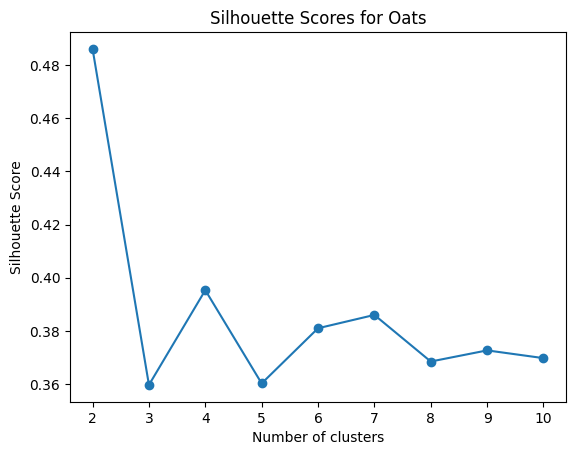

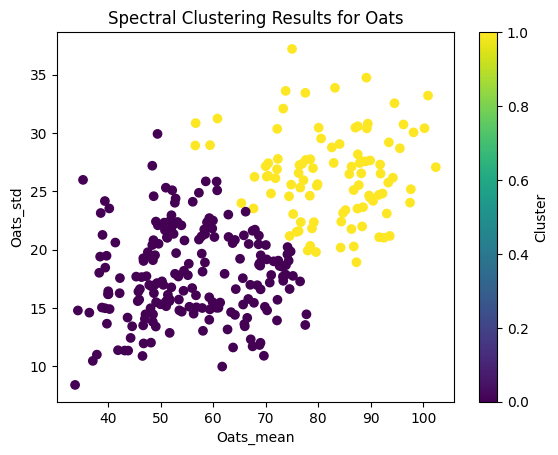

Optimal number of clusters for Lentils: 2
Silhouette scores for Lentils: [0.6312110374398491, 0.5815591963529849, 0.4949970499549356, 0.5407099788067901, 0.49615480342406576, 0.4570470006130131, 0.4285079182305935, 0.44935701846077736, 0.3891888626948434]


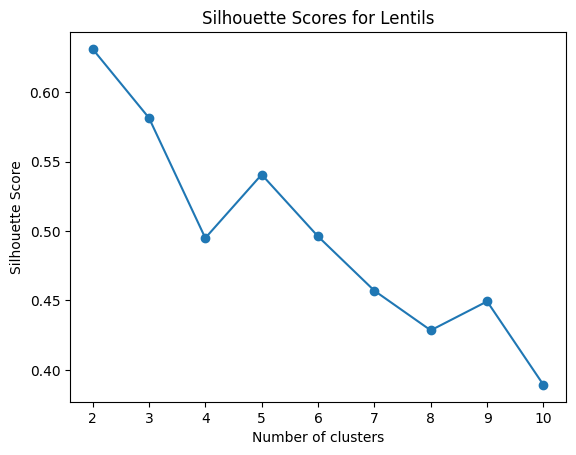

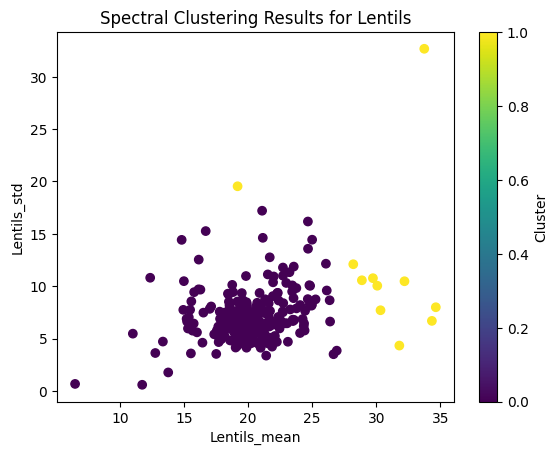

Optimal number of clusters for Peas: 2
Silhouette scores for Peas: [0.4181693484474844, 0.4112574865372375, 0.4112574865372375, 0.3516425590919209, 0.3078804024848918, 0.29754831335725, 0.3183047600348067, 0.27505129584610627, 0.2580777371247389]


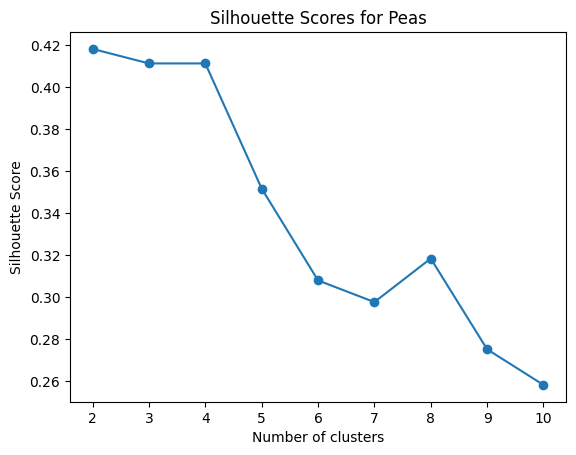

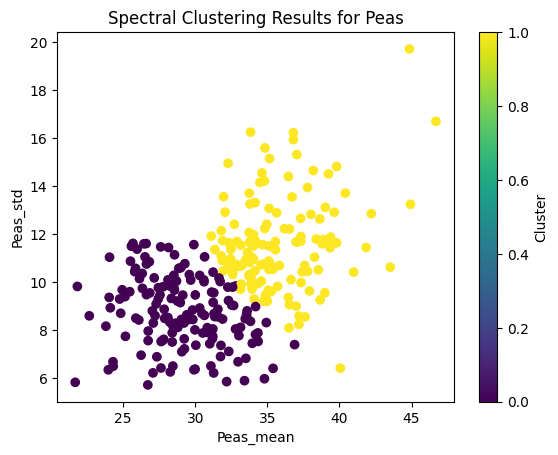

Optimal number of clusters for Barley: 2
Silhouette scores for Barley: [0.36701503848619343, 0.3348533092557515, 0.35587068730107074, 0.33419606793807277, 0.349010098057453, 0.35693409598836556, 0.32305863787314393, 0.32330991761984323, 0.34235735762646646]


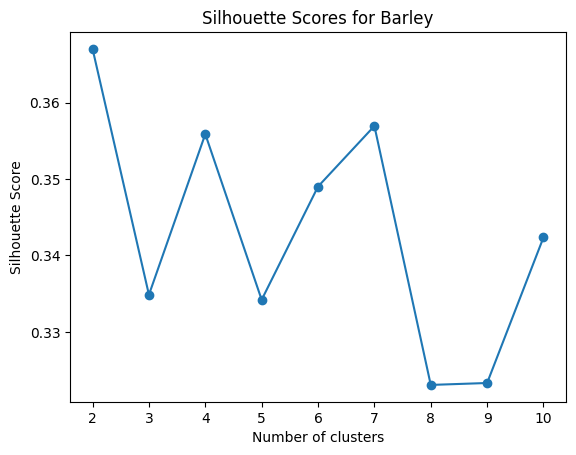

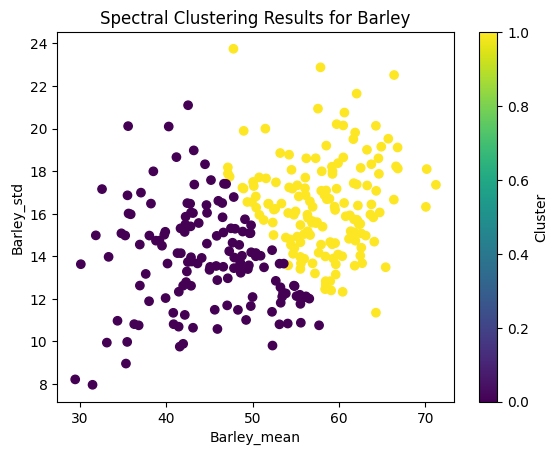

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

# Assuming df_agg_00_23 is already loaded
crops = ['Canola', 'Spring Wheat', 'Durum', 'Oats', 'Lentils', 'Peas', 'Barley']

# Function to prepare data for each crop
def prepare_data_for_crop(df, crop):
    columns = [f'{crop}_mean', f'{crop}_std']
    crop_data = df[columns].dropna().values
    return crop_data

# Standardize the data
def standardize_data(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    return data_scaled

# Function to perform spectral clustering and choose the optimal number of clusters
def spectral_clustering(data, n_clusters):
    clustering = SpectralClustering(n_clusters=n_clusters, assign_labels="discretize", random_state=0)
    labels = clustering.fit_predict(data)
    return labels

# Function to find the optimal number of clusters
def find_optimal_clusters(data, max_k):
    scores = []
    for k in range(2, max_k+1):
        labels = spectral_clustering(data, k)
        score = silhouette_score(data, labels)
        scores.append(score)
    optimal_k = scores.index(max(scores)) + 2
    return optimal_k, scores

# Iterate over each crop and perform clustering
for crop in crops:
    # Prepare the data for the crop
    crop_data = prepare_data_for_crop(df_agg_00_23, crop)
    
    # Standardize the data
    crop_data_scaled = standardize_data(crop_data)
    
    # Find the optimal number of clusters
    optimal_k, scores = find_optimal_clusters(crop_data_scaled, 10)
    
    # Perform spectral clustering with the optimal number of clusters
    labels = spectral_clustering(crop_data_scaled, optimal_k)
    
    # Add the cluster labels to the original dataframe
    df_agg_00_23[f'{crop}_Spectral_Cluster_Optimal'] = np.nan
    df_agg_00_23.loc[~df_agg_00_23[[f'{crop}_mean', f'{crop}_std']].isna().any(axis=1), f'{crop}_Spectral_Cluster_Optimal'] = labels
    
    # Print the results
    print(f'Optimal number of clusters for {crop}: {optimal_k}')
    print(f'Silhouette scores for {crop}: {scores}')
    
    # Visualize the silhouette scores
    plt.plot(range(2, 11), scores, marker='o')
    plt.title(f'Silhouette Scores for {crop}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()
    
    # Visualize the clustering results
    plt.scatter(df_agg_00_23[f'{crop}_mean'], df_agg_00_23[f'{crop}_std'], c=df_agg_00_23[f'{crop}_Spectral_Cluster_Optimal'], cmap='viridis')
    plt.title(f'Spectral Clustering Results for {crop}')
    plt.xlabel(f'{crop}_mean')
    plt.ylabel(f'{crop}_std')
    plt.colorbar(label='Cluster')
    plt.show()

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering

# Assuming df_agg_00_23 is already loaded
crops = ['Canola', 'Spring Wheat', 'Durum', 'Oats', 'Lentils', 'Peas', 'Barley']

# Function to prepare data for each crop
def prepare_data_for_crop(df, crop):
    columns = [f'{crop}_mean', f'{crop}_std']
    crop_data = df[columns].dropna().values
    return crop_data, df[columns].dropna().index

# Standardize the data
def standardize_data(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    return data_scaled

# Perform spectral clustering with a fixed number of clusters
def perform_spectral_clustering(data, n_clusters=5):
    clustering = SpectralClustering(n_clusters=n_clusters, assign_labels="discretize", random_state=0)
    labels = clustering.fit_predict(data)
    return labels

# Iterate over each crop and perform clustering
for crop in crops:
    # Prepare the data for the crop
    crop_data, indices = prepare_data_for_crop(df_agg_00_23, crop)
    
    # Standardize the data
    crop_data_scaled = standardize_data(crop_data)
    
    # Perform spectral clustering with 5 clusters
    labels = perform_spectral_clustering(crop_data_scaled, 5)
    
    # Add the cluster labels to the original dataframe
    df_agg_00_23[f'{crop}_Spectral_Cluster_Custom'] = np.nan
    df_agg_00_23.loc[indices, f'{crop}_Spectral_Cluster_Custom'] = labels

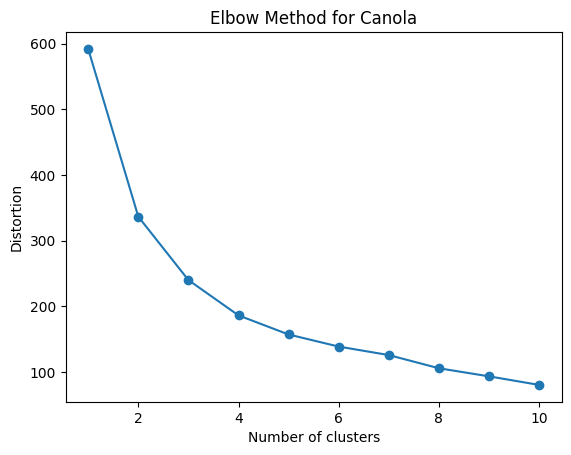

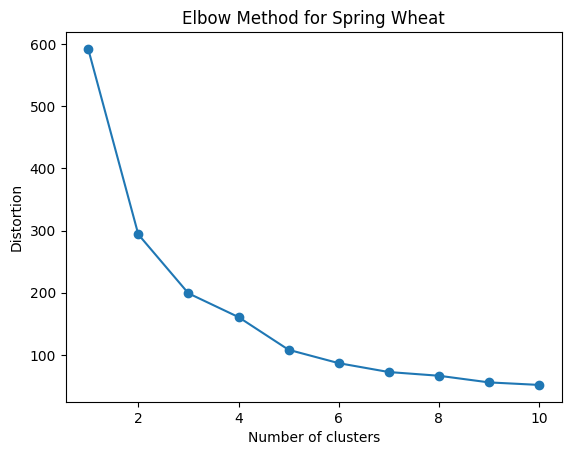

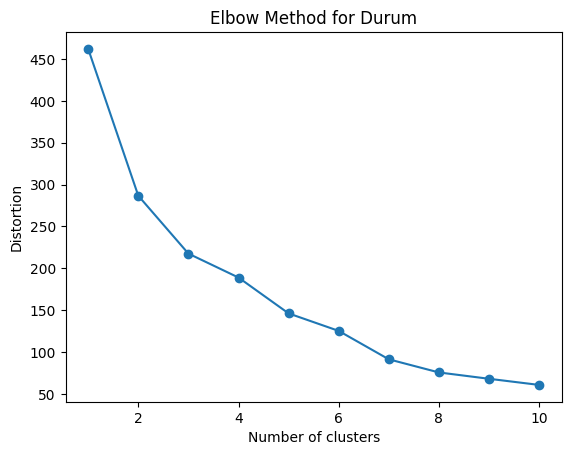

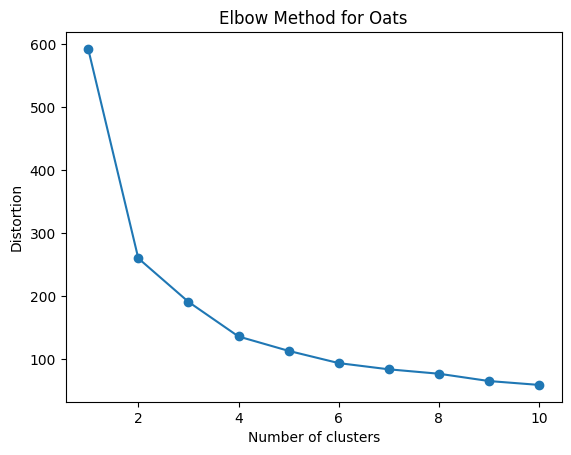

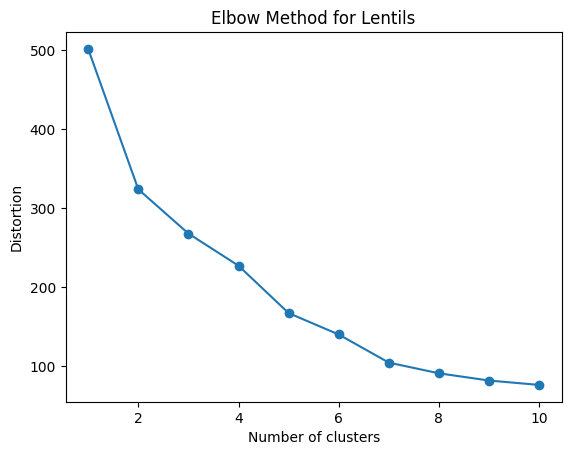

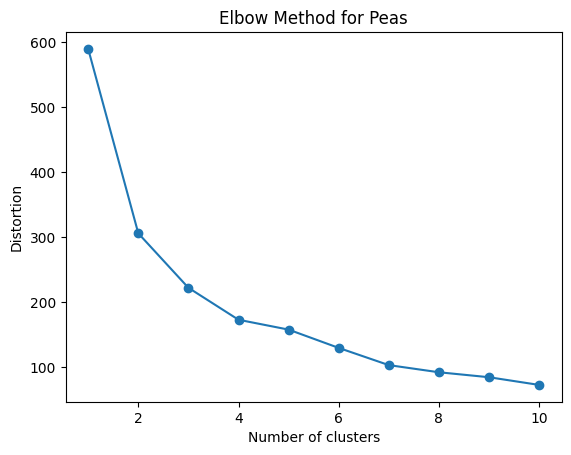

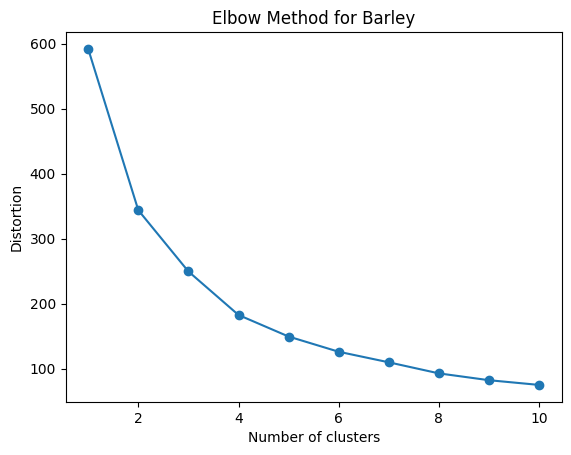

RM  Canola_mean  Canola_std  Spring Wheat_mean  Spring Wheat_std  \
0      1    28.314583    7.251919          38.569130          9.937700   
1      2    29.668750    5.456009          38.728261          8.209199   
2      3    27.938750    6.955191          37.818750          8.898998   
3      4    26.847917    6.624128          34.304583          8.999300   
4      5    26.401667    7.654146          31.305000          7.488937   
..   ...          ...         ...                ...               ...   
291  520    31.642917   11.245617          41.914167         12.705160   
292  555    34.171765   12.309706          45.965385         21.635478   
293  561    33.493636   10.563191          44.946087         14.381770   
294  588    31.999583    9.736271          44.596250         12.508024   
295  622    33.302500   11.868386          48.816250         16.470610   

     Durum_mean  Durum_std  Oats_mean   Oats_std  Lentils_mean  ...  \
0     29.716000   5.769946  68.702917  21.210231     11.716667  ...   
1     36.761250  12.107829  65.697917  15.301719     18.819643  ...   
2     38.888750   8.297462  61.715417   9.990864     15.459217  ...   
3     34.329583  10.130348  53.237619  17.791265     21.702795  ...   
4     34.202083   9.808930  51.038462  15.160395     19.988108  ...   
..          ...        ...        ...        ...           ...  ...   
291         NaN        NaN  89.890952  27.648040     11.116667  ...   
292         NaN        NaN  74.849412  25.576126           NaN  ...   
293         NaN        NaN  77.994500  19.927426     21.083333  ...   
294   31.250000  14.361407  78.482917  20.325299     20.659524  ...   
295         NaN        NaN  79.000417  26.985072           NaN  ...   

     Durum_KMeans_Cluster_Optimal  Durum_KMeans_Cluster_Custom  \
0                             1.0                          3.0   
1                             3.0                          0.0   
2                             0.0                          0.0   
3                             3.0                          1.0   
4                             3.0                          1.0   
..                            ...                          ...   
291                           NaN                          NaN   
292                           NaN                          NaN   
293                           NaN                          NaN   
294                           2.0                          0.0   
295                           NaN                          NaN   

     Oats_KMeans_Cluster_Optimal  Oats_KMeans_Cluster_Custom  \
0                            1.0                         0.0   
1                            3.0                         4.0   
2                            3.0                         4.0   
3                            4.0                         2.0   
4                            4.0                         2.0   
..                           ...                         ...   
291                          9.0                         3.0   
292                          5.0                         3.0   
293                          8.0                         0.0   
294                          8.0                         0.0   
295                          5.0                         3.0   

     Lentils_KMeans_Cluster_Optimal  Lentils_KMeans_Cluster_Custom  \
0                               9.0                            0.0   
1                               1.0                            2.0   
2                               0.0                            0.0   
3                               4.0                            2.0   
4                               8.0                            2.0   
..                              ...                            ...   
291                             NaN                            NaN   
292                             NaN                            NaN   
293                             2.0                            1.0   
29

In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df_agg_00_23 is already loaded
crops = ['Canola', 'Spring Wheat', 'Durum', 'Oats', 'Lentils', 'Peas', 'Barley']

# Function to prepare data for each crop
def prepare_data_for_crop(df, crop):
    columns = [f'{crop}_mean', f'{crop}_std']
    crop_data = df[columns].dropna().values
    return crop_data, df[columns].dropna().index

# Standardize the data
def standardize_data(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    return data_scaled

# Function to perform K-Means clustering
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(data)
    return labels

# Function to find the optimal number of clusters using the Elbow method
def find_optimal_clusters(data, max_k):
    distortions = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    optimal_k = distortions.index(min(distortions[1:])) + 1
    return optimal_k, distortions

# Iterate over each crop and perform clustering
for crop in crops:
    # Prepare the data for the crop
    crop_data, indices = prepare_data_for_crop(df_agg_00_23, crop)
    
    # Standardize the data
    crop_data_scaled = standardize_data(crop_data)
    
    # Find the optimal number of clusters using the Elbow method
    optimal_k, distortions = find_optimal_clusters(crop_data_scaled, 10)
    
    # Perform K-Means clustering with the optimal number of clusters
    optimal_labels = kmeans_clustering(crop_data_scaled, optimal_k)
    
    # Perform K-Means clustering with 5 clusters
    fixed_labels = kmeans_clustering(crop_data_scaled, 5)
    
    # Add the cluster labels to the original dataframe
    df_agg_00_23[f'{crop}_KMeans_Cluster_Optimal'] = np.nan
    df_agg_00_23[f'{crop}_KMeans_Cluster_Custom'] = np.nan
    df_agg_00_23.loc[indices, f'{crop}_KMeans_Cluster_Optimal'] = optimal_labels
    df_agg_00_23.loc[indices, f'{crop}_KMeans_Cluster_Custom'] = fixed_labels
    
    # Plot the Elbow method graph
    plt.plot(range(1, 11), distortions, marker='o')
    plt.title(f'Elbow Method for {crop}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

# Display the dataframe with the new cluster columns
df_agg_00_23

In [113]:
# List of crops and corresponding cluster columns
crops_clusters = {
    'Canola': ['Canola_Spectral_Cluster_Optimal', 'Canola_Spectral_Cluster_Custom', 'Canola_KMeans_Cluster_Optimal', 'Canola_KMeans_Cluster_Custom'],
    'Spring Wheat': ['Spring Wheat_Spectral_Cluster_Optimal', 'Spring Wheat_Spectral_Cluster_Custom', 'Spring Wheat_KMeans_Cluster_Optimal', 'Spring Wheat_KMeans_Cluster_Custom'],
    'Durum': ['Durum_Spectral_Cluster_Optimal', 'Durum_Spectral_Cluster_Custom', 'Durum_KMeans_Cluster_Optimal', 'Durum_KMeans_Cluster_Custom'],
    'Oats': ['Oats_Spectral_Cluster_Optimal', 'Oats_Spectral_Cluster_Custom', 'Oats_KMeans_Cluster_Optimal', 'Oats_KMeans_Cluster_Custom'],
    'Lentils': ['Lentils_Spectral_Cluster_Optimal', 'Lentils_Spectral_Cluster_Custom', 'Lentils_KMeans_Cluster_Optimal', 'Lentils_KMeans_Cluster_Custom'],
    'Peas': ['Peas_Spectral_Cluster_Optimal', 'Peas_Spectral_Cluster_Custom', 'Peas_KMeans_Cluster_Optimal', 'Peas_KMeans_Cluster_Custom'],
    'Barley': ['Barley_Spectral_Cluster_Optimal', 'Barley_Spectral_Cluster_Custom', 'Barley_KMeans_Cluster_Optimal', 'Barley_KMeans_Cluster_Custom']
}

# Initialize a new DataFrame for ranked columns
df_agg_00_23_ranked = df_agg_00_23.copy()

# Rank the clusters based on the mean crop yield for each crop
for crop, clusters in crops_clusters.items():
    mean_column = f'{crop}_mean'
    
    for cluster_col in clusters:
        # Calculate the mean crop yield grouped by the cluster column
        cluster_means = df_agg_00_23.groupby(cluster_col).mean()[mean_column]
        
        # Rank the clusters based on the mean crop yield
        df_agg_00_23_ranked[f'{cluster_col}_ranked'] = df_agg_00_23[cluster_col].map(cluster_means.rank(method='min'))

# Drop old unranked cluster columns
for clusters in crops_clusters.values():
    df_agg_00_23_ranked.drop(columns=clusters, inplace=True)

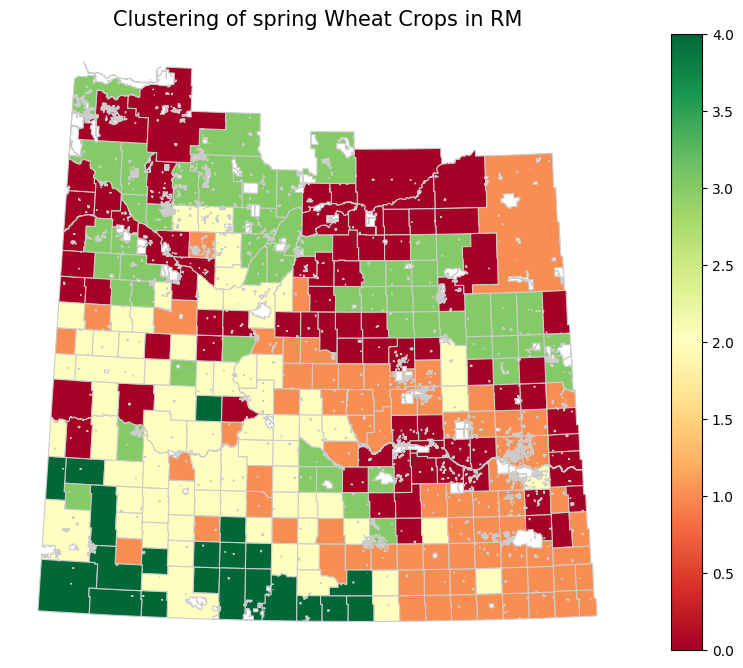

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df_agg_00_23 is already loaded
crops = ['Spring Wheat']

# Function to prepare data for each crop
def prepare_data_for_crop(df, crop):
    columns = [f'{crop}_mean', f'{crop}_std']
    crop_data = df[columns].dropna().values
    return crop_data, df[columns].dropna().index

# Standardize the data
def standardize_data(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    return data_scaled

# Function to perform K-Means clustering
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(data)
    return labels

# Function to find the optimal number of clusters using the Elbow method
def find_optimal_clusters(data, max_k):
    distortions = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    optimal_k = distortions.index(min(distortions[1:])) + 1
    return optimal_k, distortions
    # Iterate over each crop and perform clustering
for crop in crops:
    # Prepare the data for the crop
    crop_data, indices = prepare_data_for_crop(df_agg_00_23, crop)
    
    # Standardize the data
    crop_data_scaled = standardize_data(crop_data)
    
    # Find the optimal number of clusters using the Elbow method
    optimal_k, distortions = find_optimal_clusters(crop_data_scaled, 10)
    
    # Perform K-Means clustering with the optimal number of clusters
    optimal_labels = kmeans_clustering(crop_data_scaled, optimal_k)
    
    # Perform K-Means clustering with 5 clusters
    fixed_labels = kmeans_clustering(crop_data_scaled, 5)
    
    # Add the cluster labels to the original dataframe
    df_agg_00_23[f'{crop}_KMeans_Cluster_Optimal'] = np.nan
    df_agg_00_23[f'{crop}_KMeans_Cluster_Custom'] = np.nan
    df_agg_00_23.loc[indices, f'{crop}_KMeans_Cluster_Optimal'] = optimal_labels
    df_agg_00_23.loc[indices, f'{crop}_KMeans_Cluster_Custom'] = fixed_labels
    
# Plotting the RM map with Canola clusters
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf_rm_with_clusters.plot(column='Canola_Cluster', cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Clustering of spring Wheat Crops in RM', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_axis_off()
plt.show()

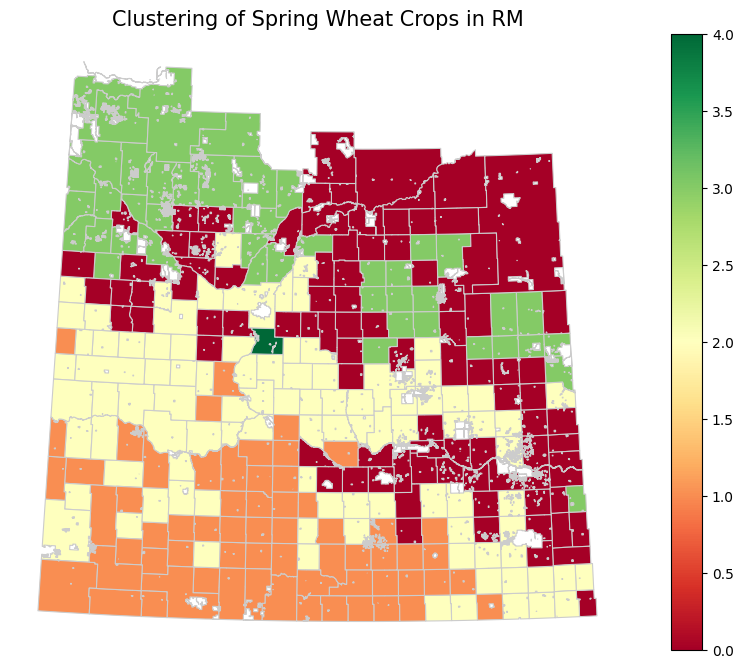

In [3]:



# Extract Spring Wheat data
spring_wheat_columns = ['Spring Wheat_mean', 'Spring Wheat_std']
spring_wheat_data, indices = df_agg_00_23[spring_wheat_columns].dropna().values, df_agg_00_23[spring_wheat_columns].dropna().index

# Standardize Spring Wheat data
scaler = StandardScaler()
spring_wheat_data_scaled = scaler.fit_transform(spring_wheat_data)

# Perform K-Means clustering with 5 clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
spring_wheat_labels = kmeans.fit_predict(spring_wheat_data_scaled)

# Add cluster labels to the DataFrame
df_agg_00_23['Spring_Wheat_Cluster'] = np.nan
df_agg_00_23.loc[indices, 'Spring_Wheat_Cluster'] = spring_wheat_labels

# Merge cluster labels with RM boundary data
gdf_rm_with_clusters = gdf_rm_clean.merge(df_agg_00_23[['RM', 'Spring_Wheat_Cluster']], on='RM', how='left')

# Plot the RM map with Spring Wheat clusters
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf_rm_with_clusters.plot(column='Spring_Wheat_Cluster', cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Clustering of Spring Wheat Crops in RM', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_axis_off()
plt.show()
